<a href="https://colab.research.google.com/github/mracy/Call-Center-Dataset-Analysis-and-Profiling/blob/main/Call_Center_Dataset_Analysis_and_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load Libraries
Name: Import Libraries
Explanation: Import necessary Python libraries for data analysis and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Datasets
Name: Load Datasets
Explanation: Load the CSV files into DataFrames.

In [ ]:
# Load datasets
calls_df = pd.read_csv('/content/calls.csv')
counters_df = pd.read_csv('/content/counters.csv')
call_statuses_df = pd.read_csv('/content/call_statuses.csv')
languages_df = pd.read_csv('/content/languages.csv')
permissions_df = pd.read_csv('/content/permissions.csv')
queues_df = pd.read_csv('/content/queues.csv')
role_has_permissions_df = pd.read_csv('/content/role_has_permissions.csv')
roles_df = pd.read_csv('/content/roles.csv')
services_df = pd.read_csv('/content/services.csv')
users_df = pd.read_csv('/content/users.csv')


3. Data Preparation
Name: Preprocess Data
Explanation: Define a function to preprocess each dataset by dropping duplicates, filling missing values, and removing outliers.



In [ ]:
# Data Preparation
def preprocess_data(df):
    df = df.drop_duplicates()
    df = df.fillna(method='ffill').fillna(method='bfill')
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        mean = df[col].mean()
        std_dev = df[col].std()
        df = df[(df[col] >= (mean - 3 * std_dev)) & (df[col] <= (mean + 3 * std_dev))]
    return df


4. Apply Preprocessing
Name: Apply Preprocessing
Explanation: Apply the preprocessing function to each dataset.

In [ ]:
# Apply preprocessing to each dataset
calls_df = preprocess_data(calls_df)
counters_df = preprocess_data(counters_df)
call_statuses_df = preprocess_data(call_statuses_df)
languages_df = preprocess_data(languages_df)
permissions_df = preprocess_data(permissions_df)
queues_df = preprocess_data(queues_df)
role_has_permissions_df = preprocess_data(role_has_permissions_df)
roles_df = preprocess_data(roles_df)
services_df = preprocess_data(services_df)
users_df = preprocess_data(users_df)


5. Descriptive Statistics
Name: Descriptive Statistics
Explanation: Define a function to print descriptive statistics for each dataset. This includes count, mean, std, min, and max for numeric columns.

In [ ]:
# Descriptive Statistics
def descriptive_statistics(df, name):
    print(f"{name} DataFrame Statistics:")
    print(df.describe(), "\n")

descriptive_statistics(calls_df, "Calls")
descriptive_statistics(counters_df, "Counters")
descriptive_statistics(call_statuses_df, "Call Statuses")
descriptive_statistics(languages_df, "Languages")
descriptive_statistics(permissions_df, "Permissions")
descriptive_statistics(queues_df, "Queues")
descriptive_statistics(role_has_permissions_df, "Role Has Permissions")
descriptive_statistics(roles_df, "Roles")
descriptive_statistics(services_df, "Services")
descriptive_statistics(users_df, "Users")


Calls DataFrame Statistics:
                28           45            1            2          2.1  \
count  3353.000000  3353.000000  3353.000000  3353.000000  3353.000000   
mean   1985.106174  1736.770057     1.599165     5.234119     8.948404   
std    1135.043109   972.864935     0.619222     2.916152     3.245985   
min      29.000000    46.000000     1.000000     1.000000     2.000000   
25%    1013.000000   900.000000     1.000000     3.000000     6.000000   
50%    1947.000000  1738.000000     2.000000     5.000000     9.000000   
75%    2961.000000  2579.000000     2.000000     8.000000    12.000000   
max    4021.000000  3417.000000     3.000000    10.000000    15.000000   

               1.1          1.2  
count  3353.000000  3353.000000  
mean     41.971667     1.178944  
std      28.305740     0.383363  
min       1.000000     1.000000  
25%      17.000000     1.000000  
50%      40.000000     1.000000  
75%      64.000000     1.000000  
max     119.000000     2.000000  

6. Visualizations
Name: Plot Distributions
Explanation: Define a function to plot the distribution of numeric columns in each dataset using histograms and KDE plots.



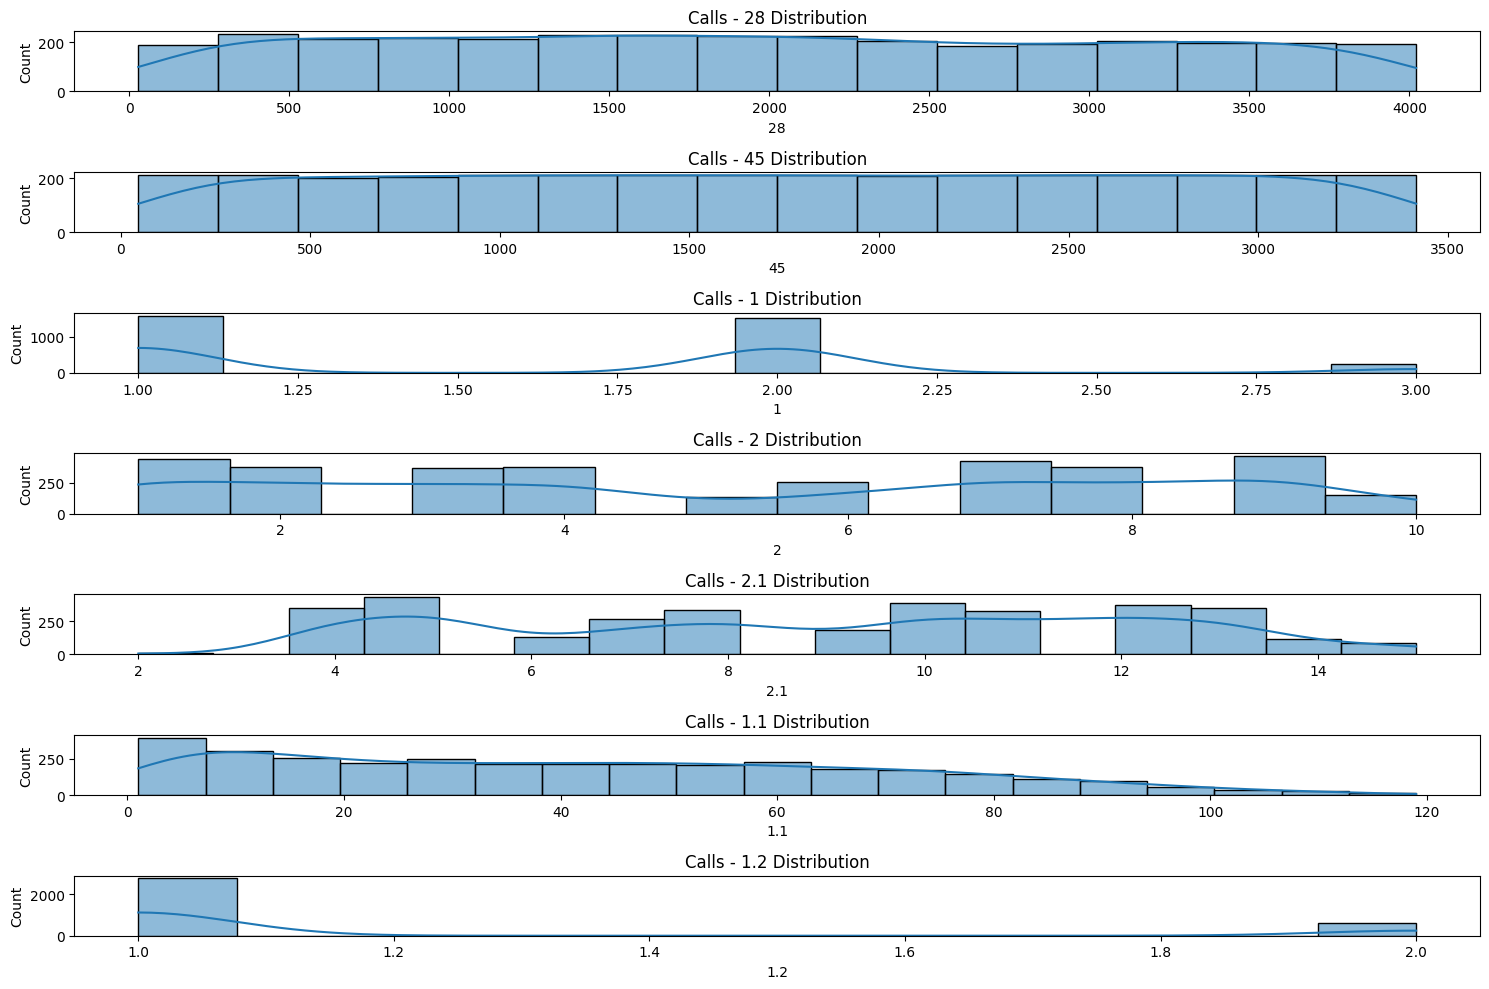

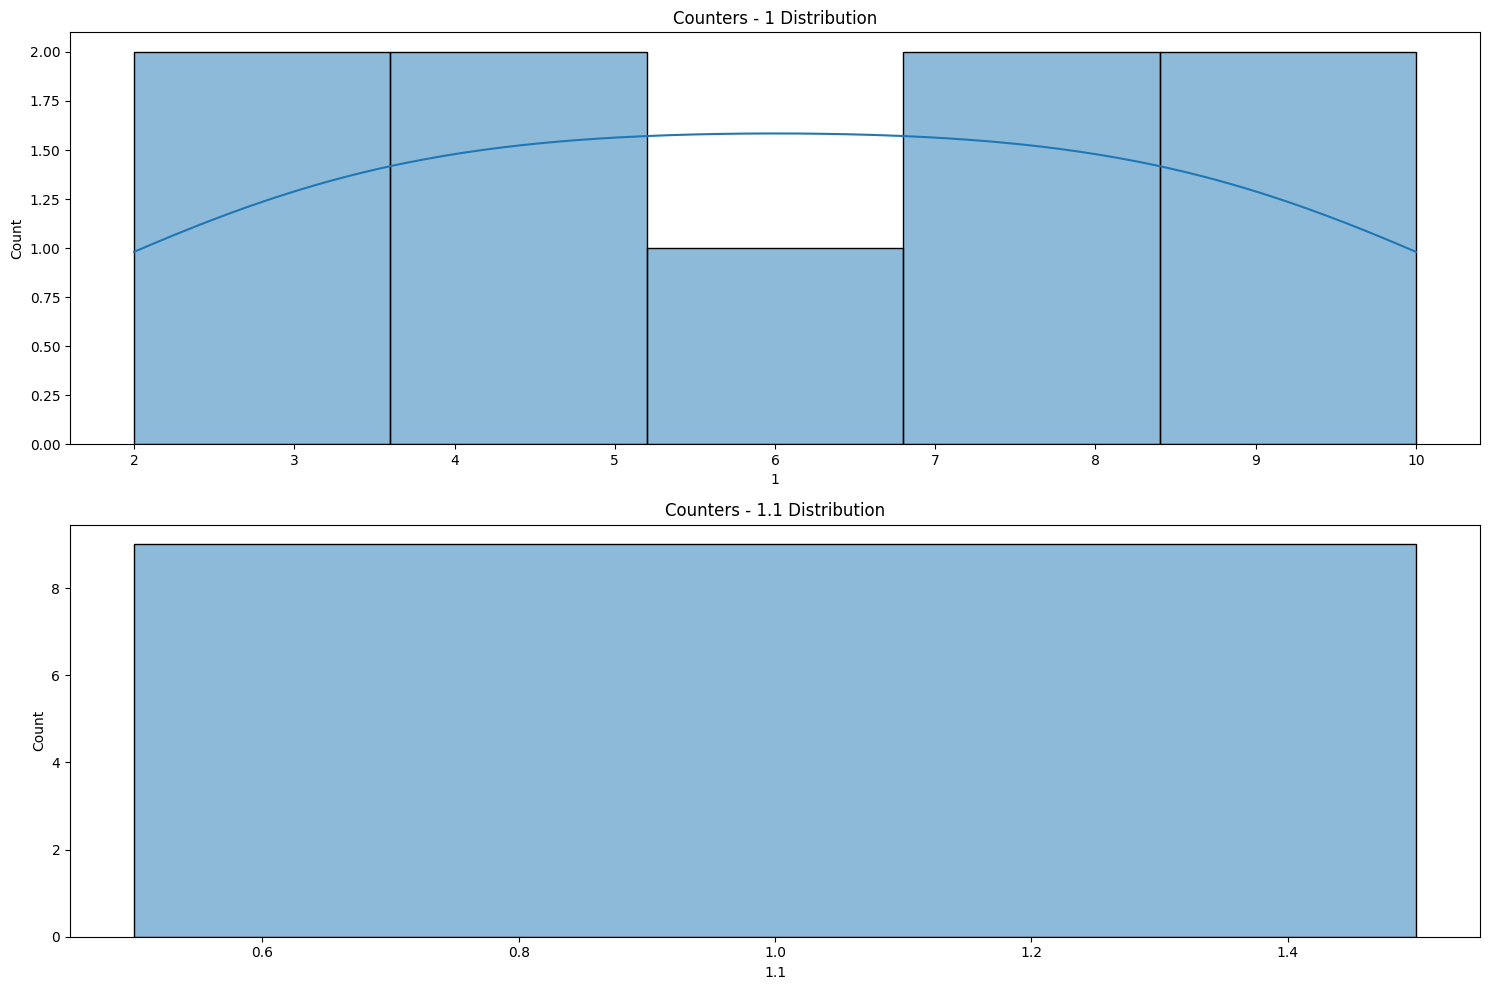

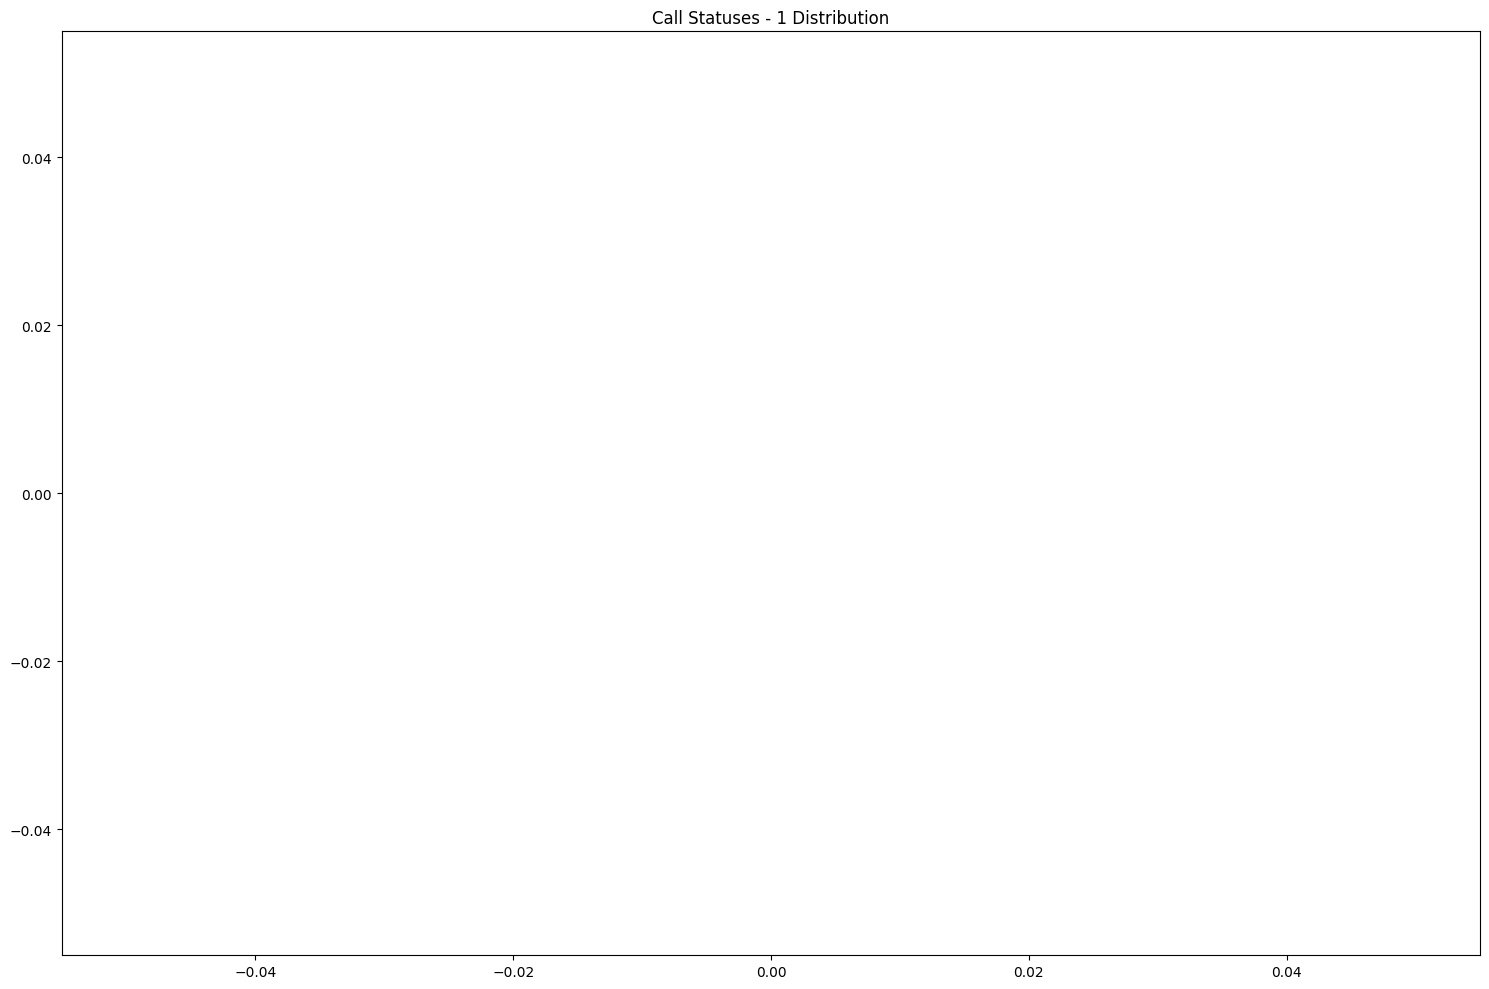

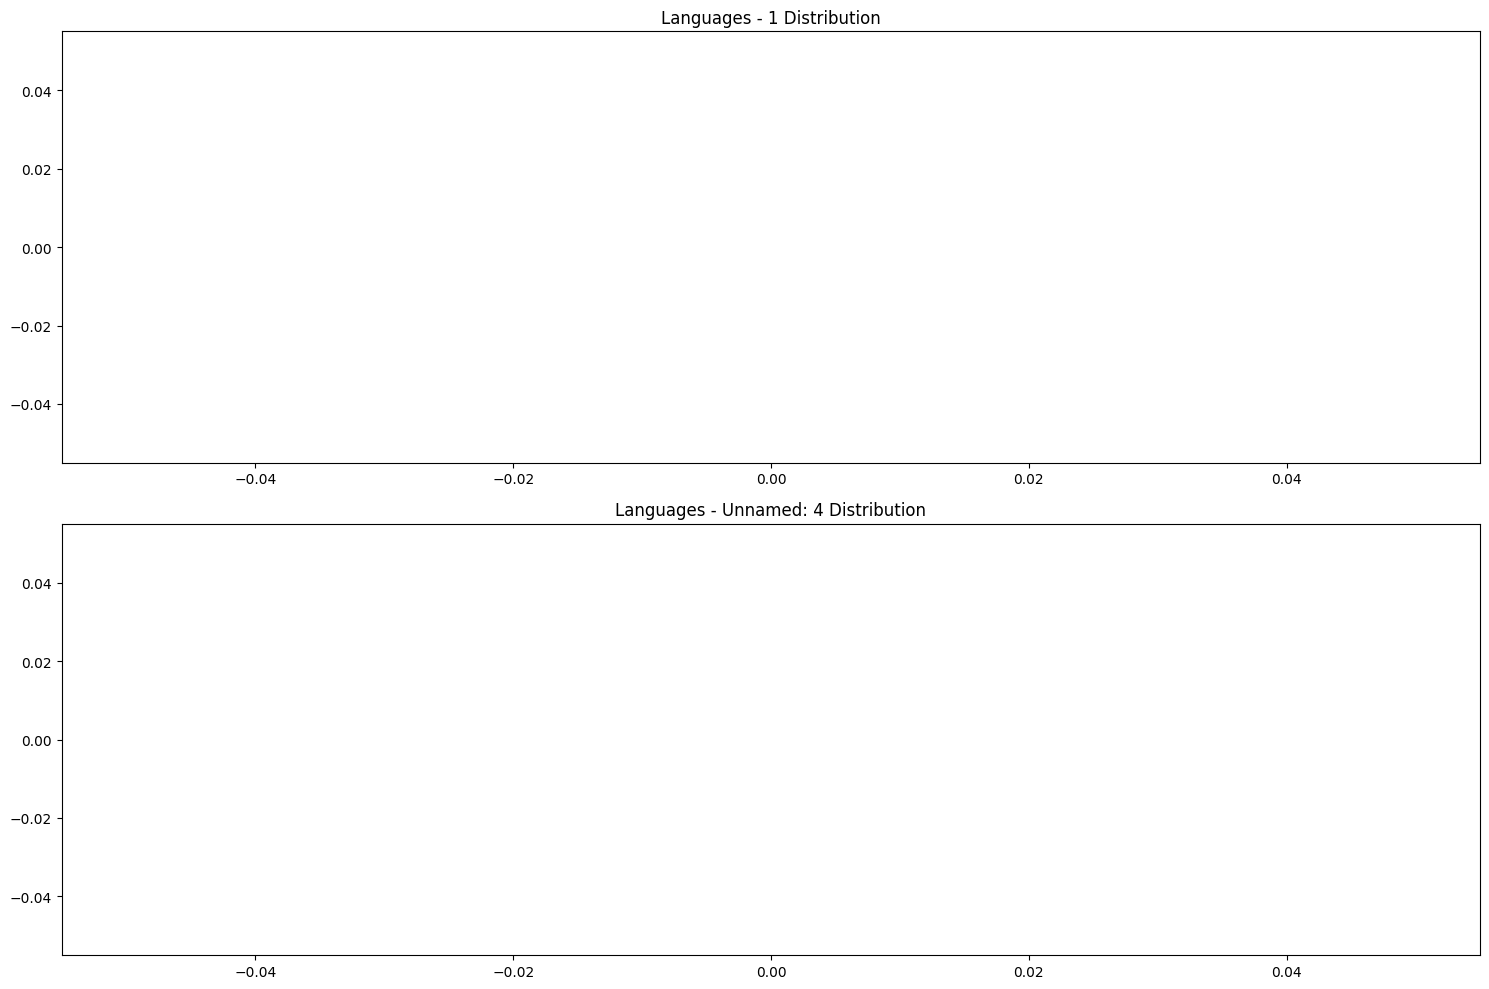

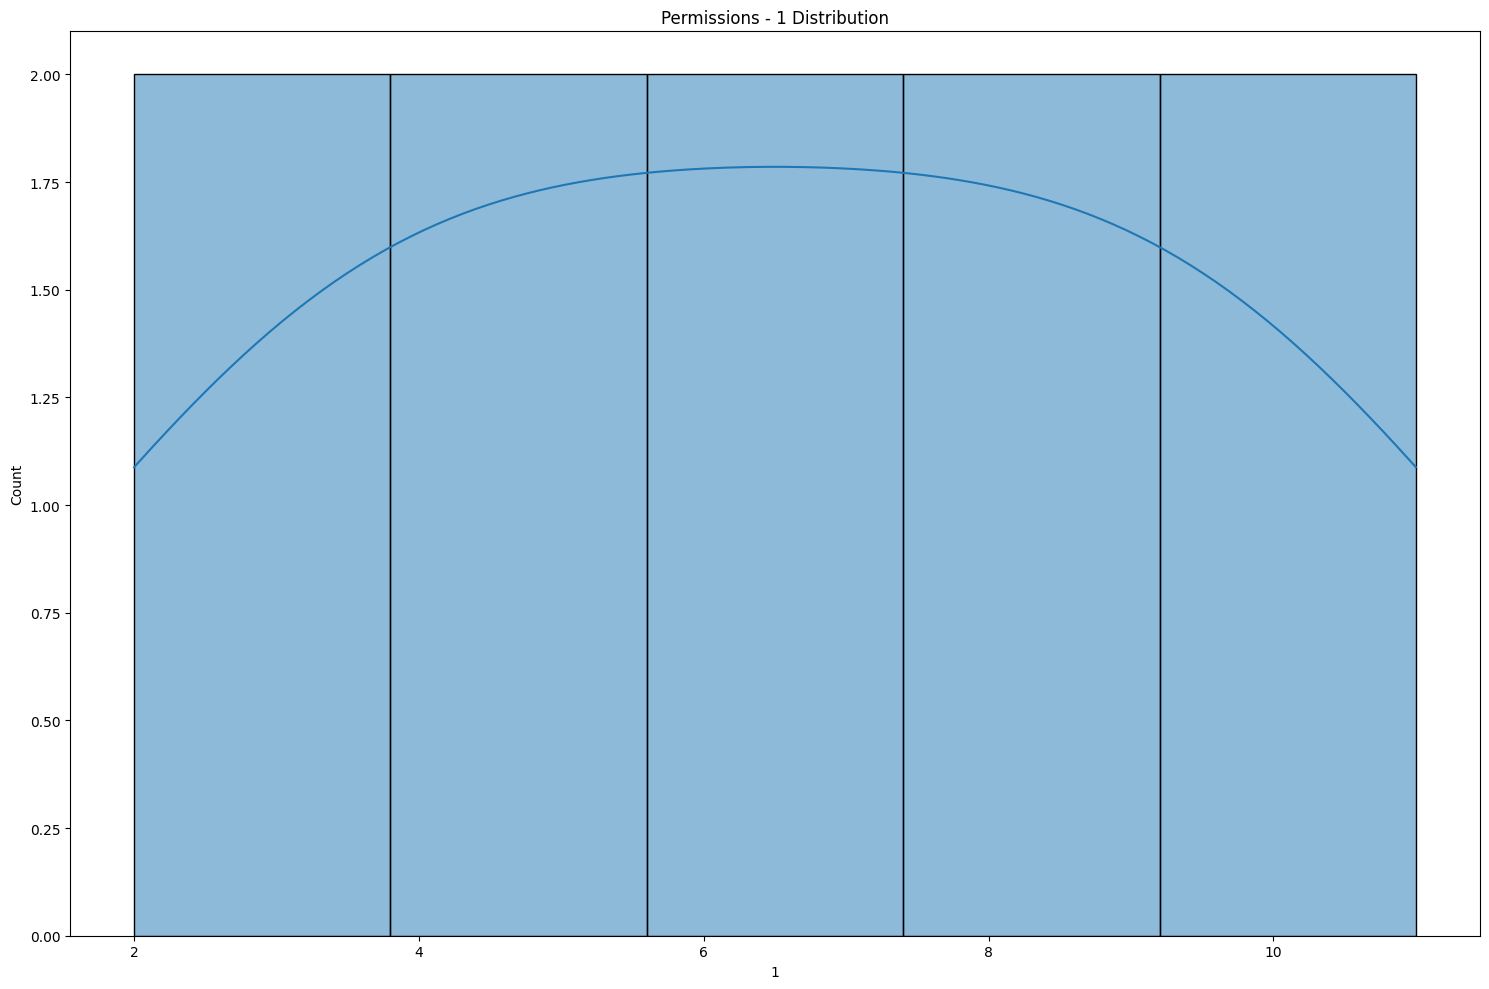

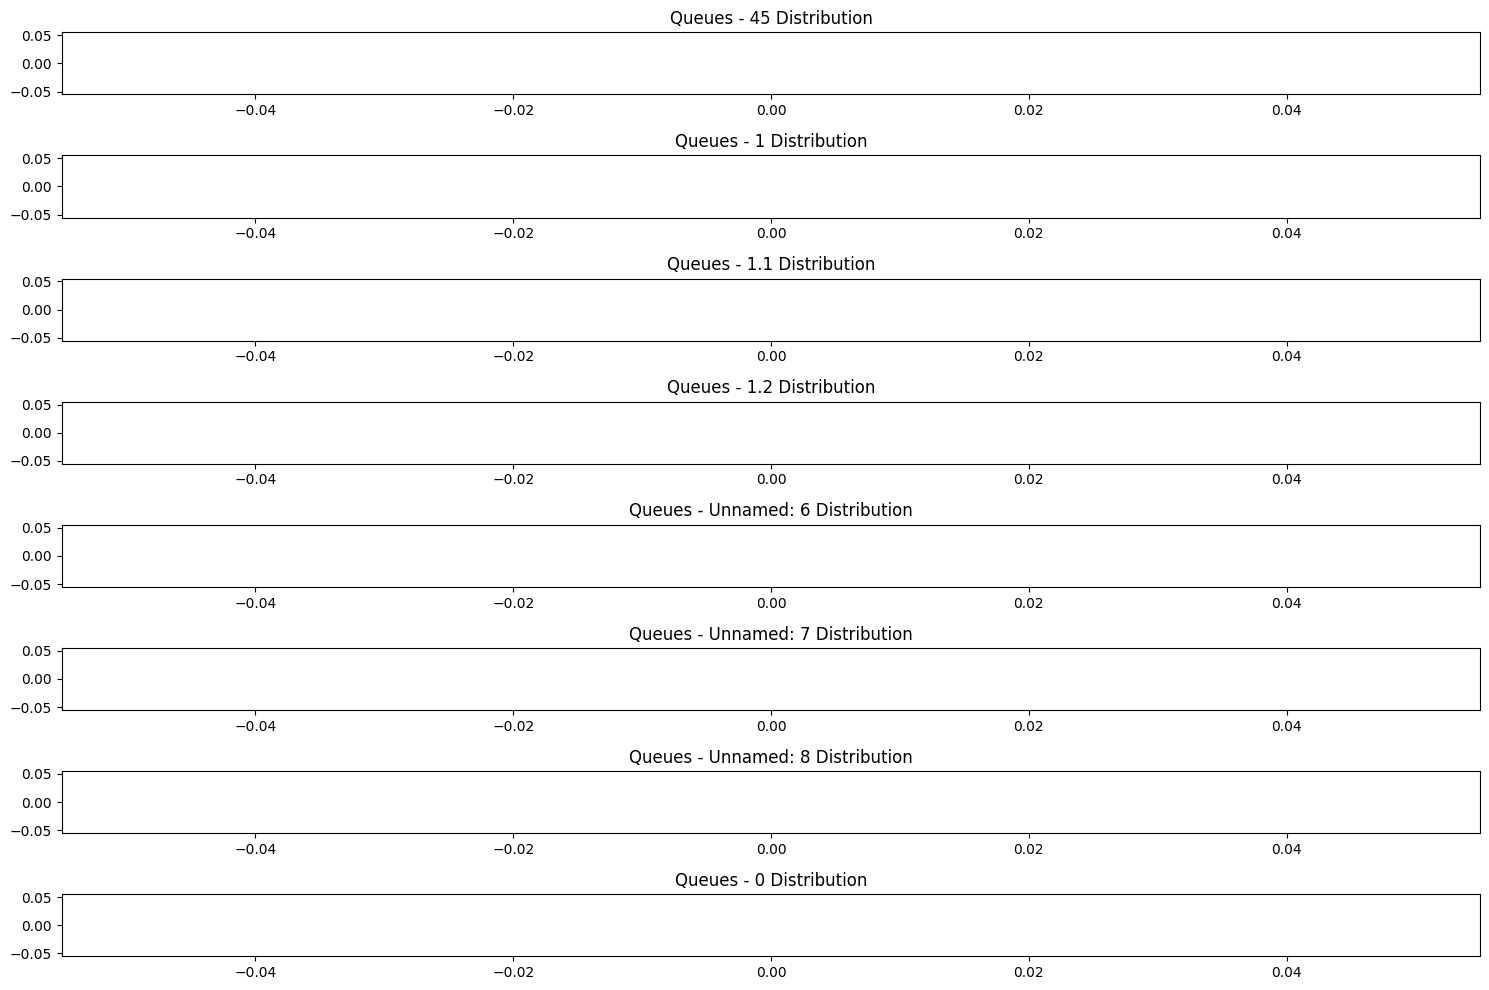

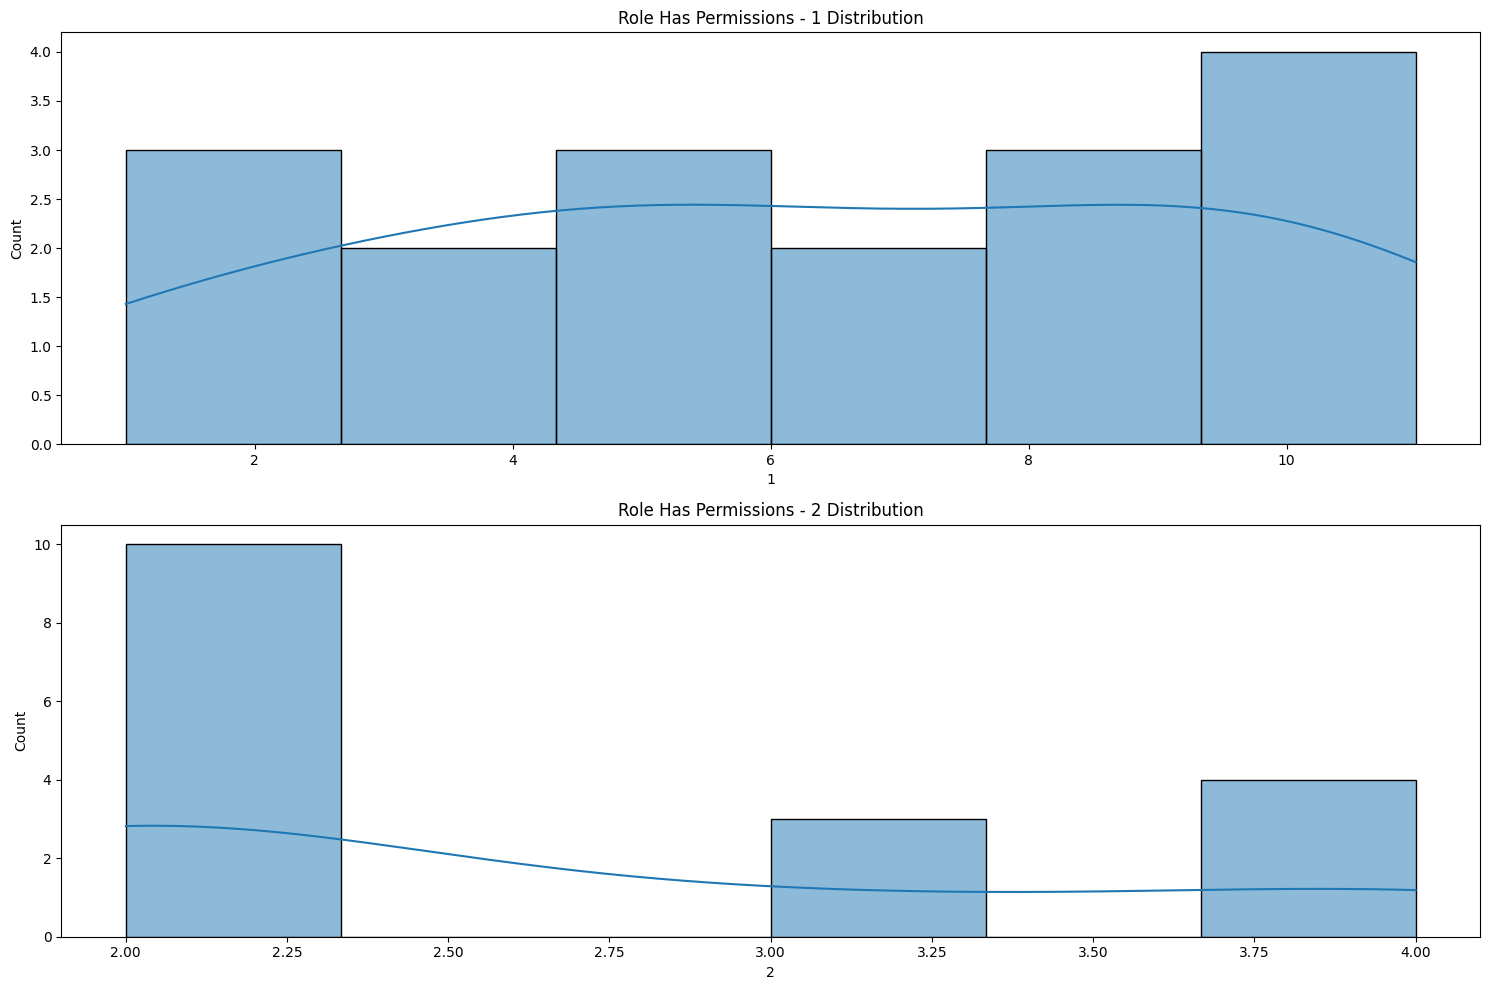

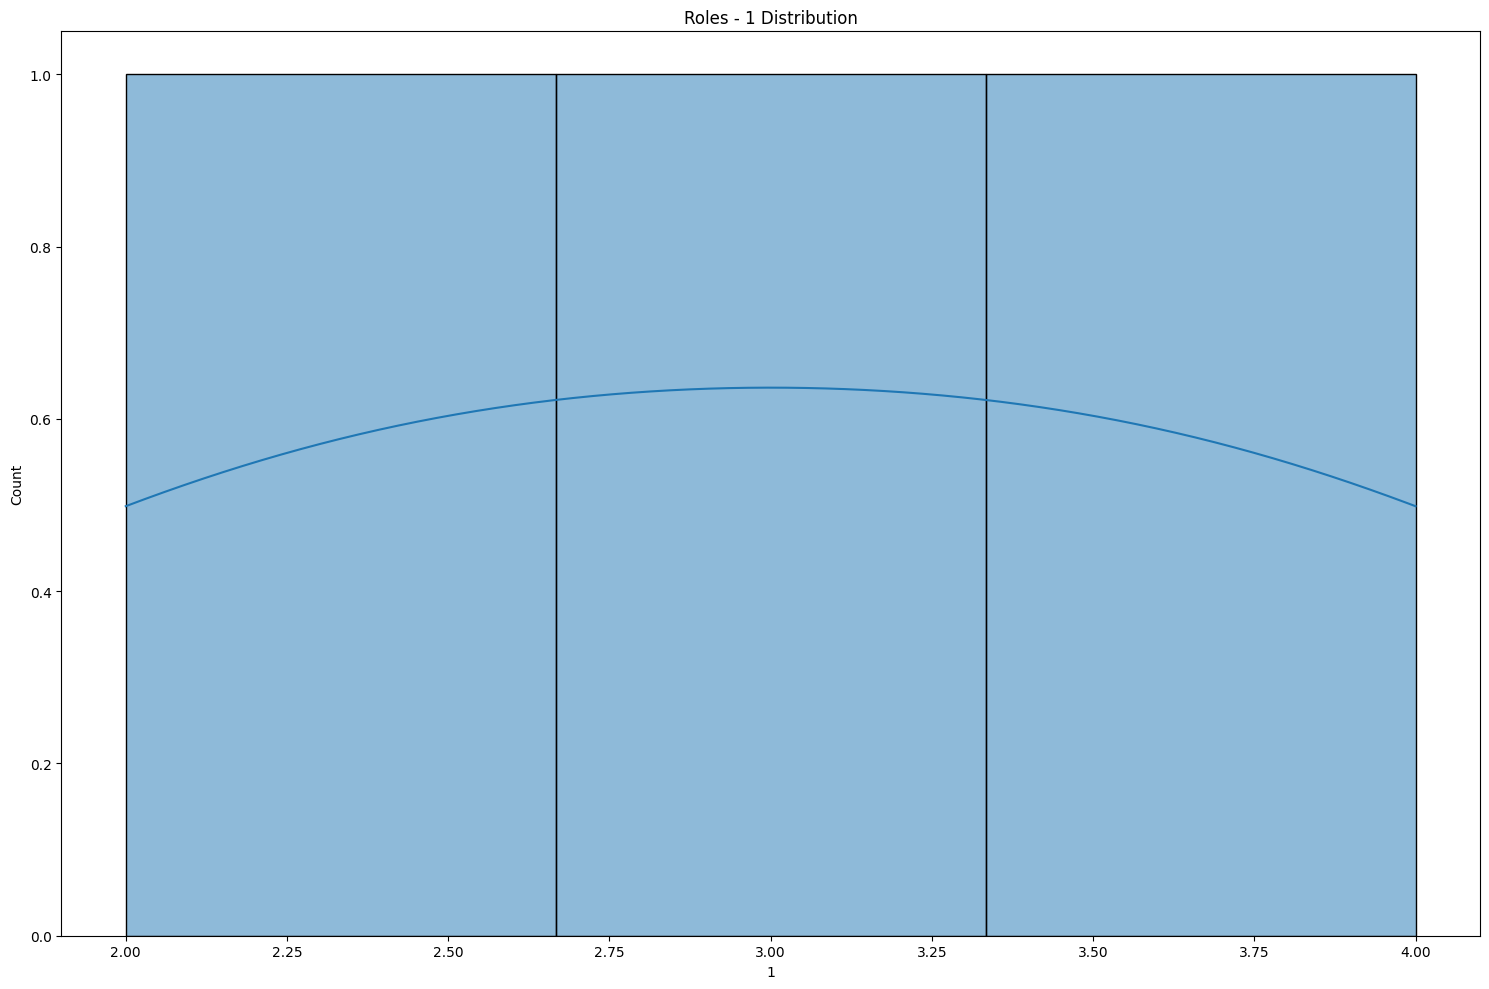

<ipython-input-30-523c4ca6cd96>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


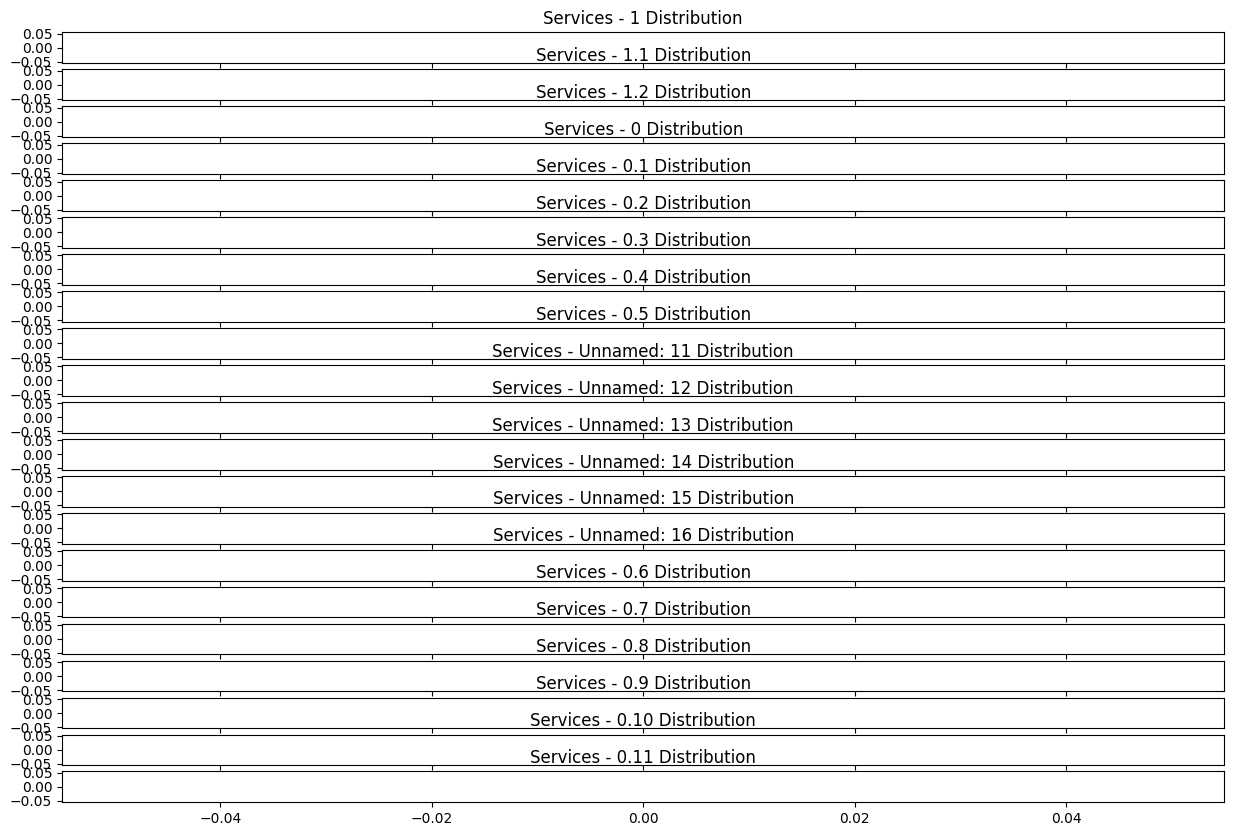

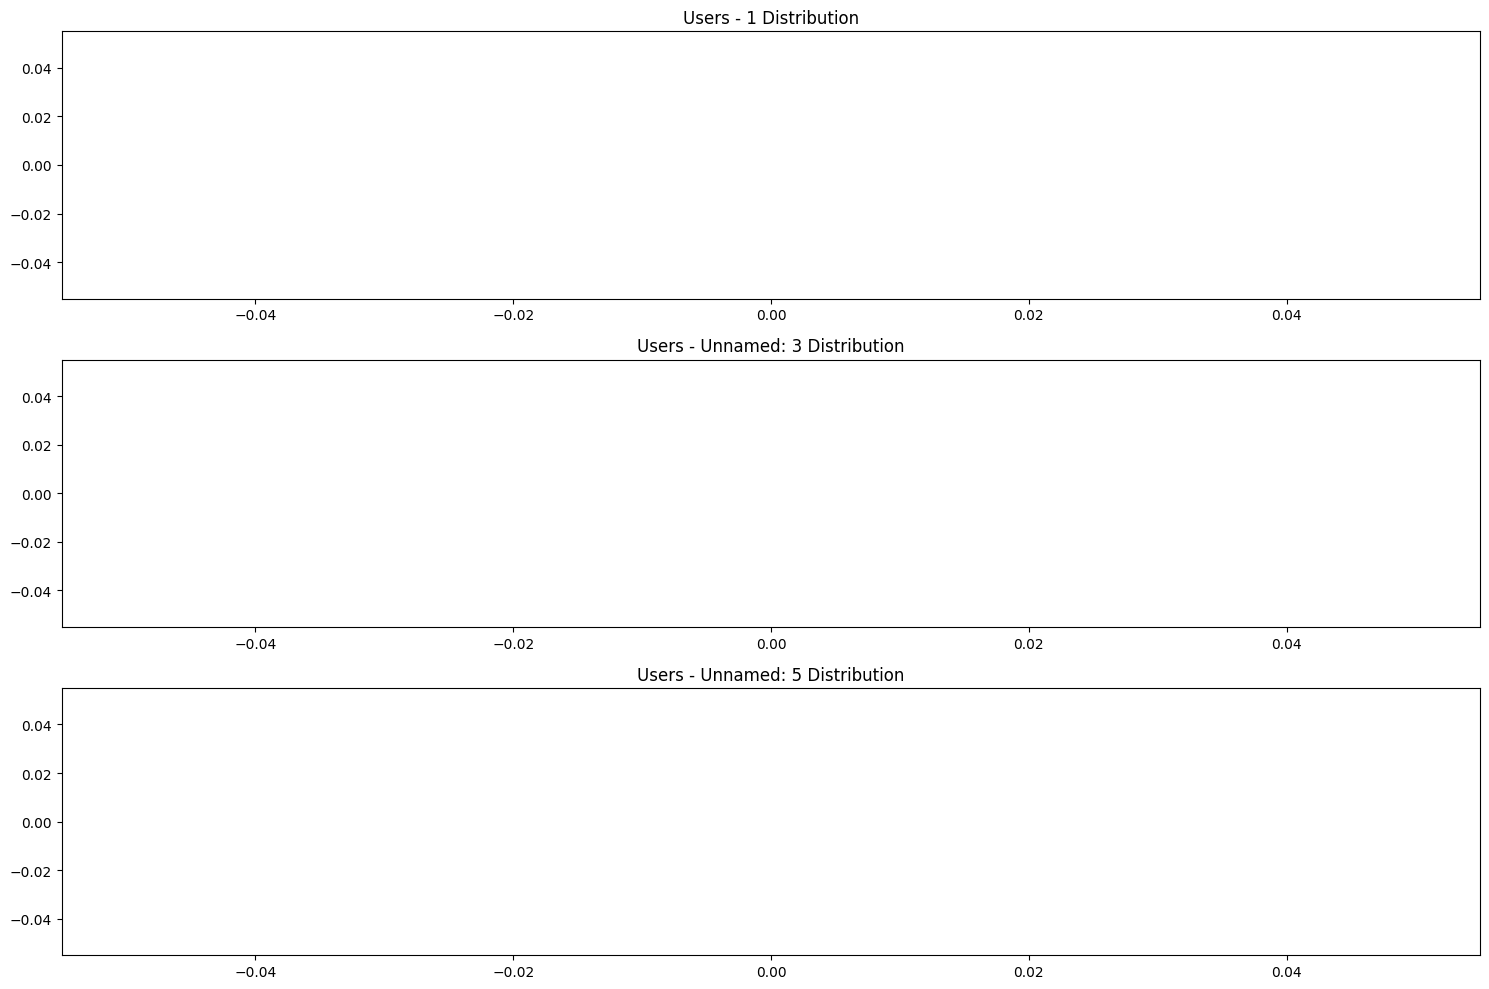

In [ ]:
# Visualizations
def plot_distributions(df, name):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'{name} - {col} Distribution')
    plt.tight_layout()
    plt.show()

plot_distributions(calls_df, "Calls")
plot_distributions(counters_df, "Counters")
plot_distributions(call_statuses_df, "Call Statuses")
plot_distributions(languages_df, "Languages")
plot_distributions(permissions_df, "Permissions")
plot_distributions(queues_df, "Queues")
plot_distributions(role_has_permissions_df, "Role Has Permissions")
plot_distributions(roles_df, "Roles")
plot_distributions(services_df, "Services")
plot_distributions(users_df, "Users")


7. Correlation Analysis
Name: Correlation Analysis
Explanation: Define a function to calculate and plot the correlation heatmap for numeric columns in each dataset.

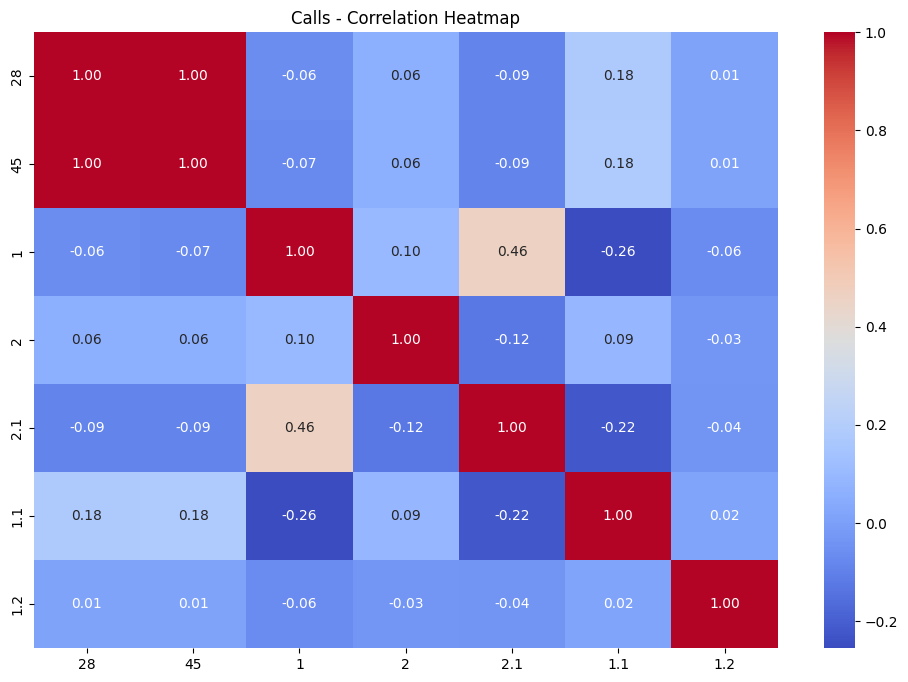

Calls Correlation Insights:
           28        45         1         2       2.1       1.1       1.2
28   1.000000  0.999458 -0.061827  0.059196 -0.090589  0.179290  0.009950
45   0.999458  1.000000 -0.069763  0.061060 -0.091501  0.181538  0.010143
1   -0.061827 -0.069763  1.000000  0.101548  0.464812 -0.255430 -0.064720
2    0.059196  0.061060  0.101548  1.000000 -0.124033  0.090424 -0.032949
2.1 -0.090589 -0.091501  0.464812 -0.124033  1.000000 -0.222941 -0.038608
1.1  0.179290  0.181538 -0.255430  0.090424 -0.222941  1.000000  0.015148
1.2  0.009950  0.010143 -0.064720 -0.032949 -0.038608  0.015148  1.000000 



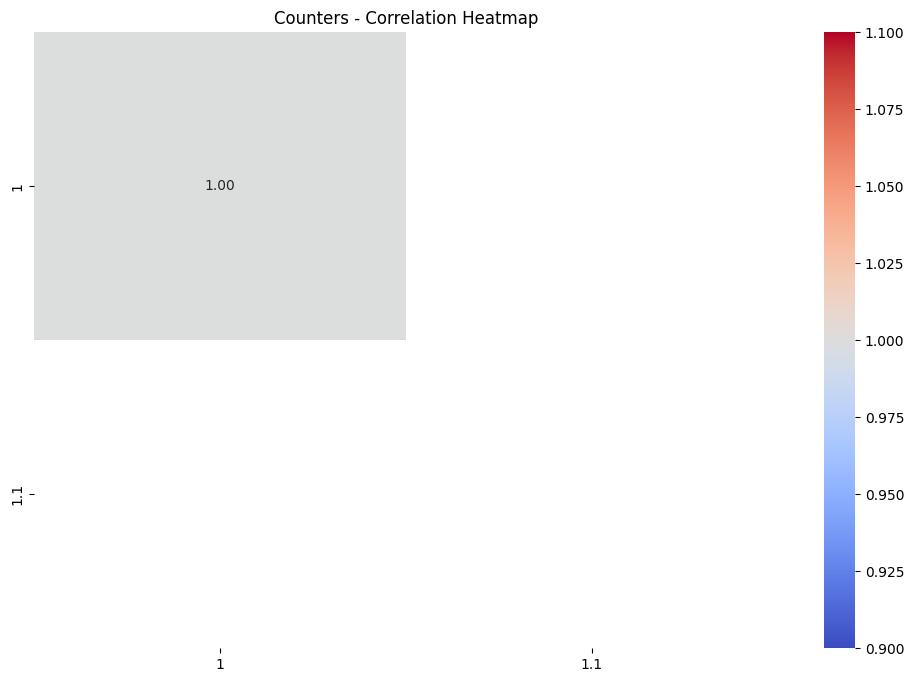

Counters Correlation Insights:
       1  1.1
1    1.0  NaN
1.1  NaN  NaN 

Call Statuses DataFrame has no numeric columns for correlation analysis.
Languages DataFrame has no numeric columns for correlation analysis.


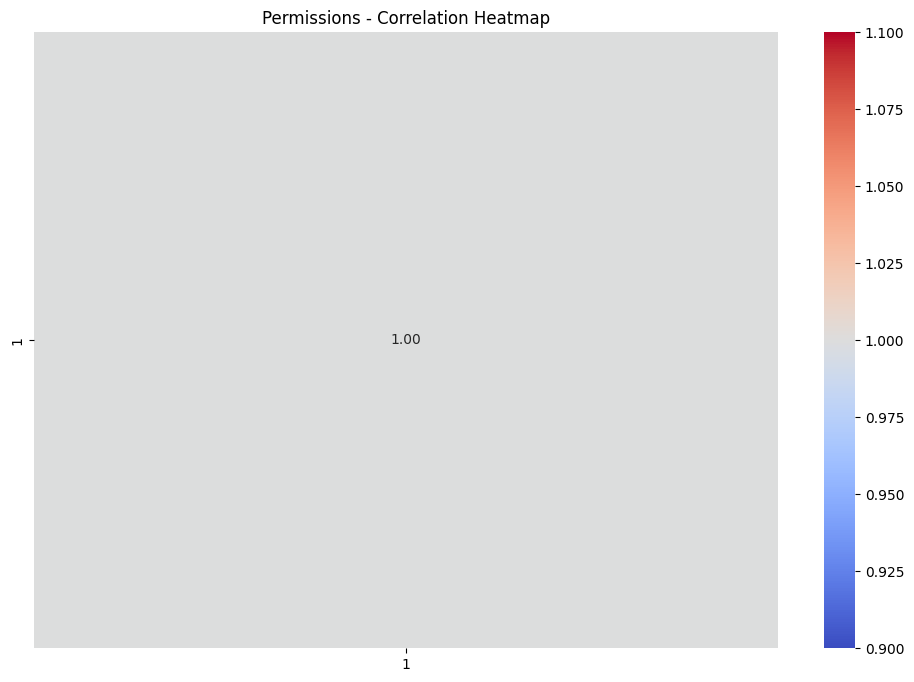

Permissions Correlation Insights:
     1
1  1.0 

Queues DataFrame has no numeric columns for correlation analysis.


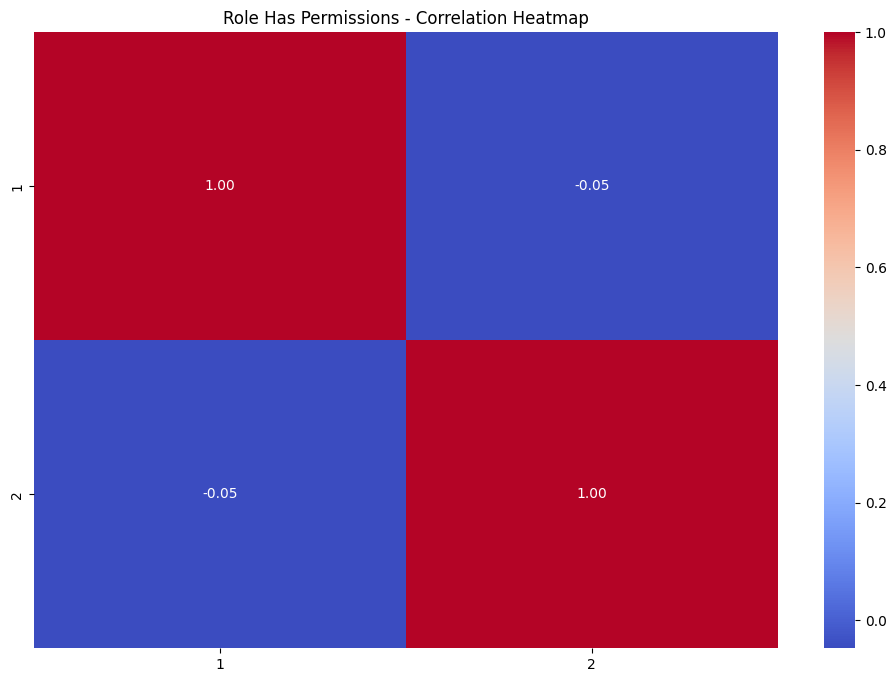

Role Has Permissions Correlation Insights:
          1         2
1  1.000000 -0.047608
2 -0.047608  1.000000 



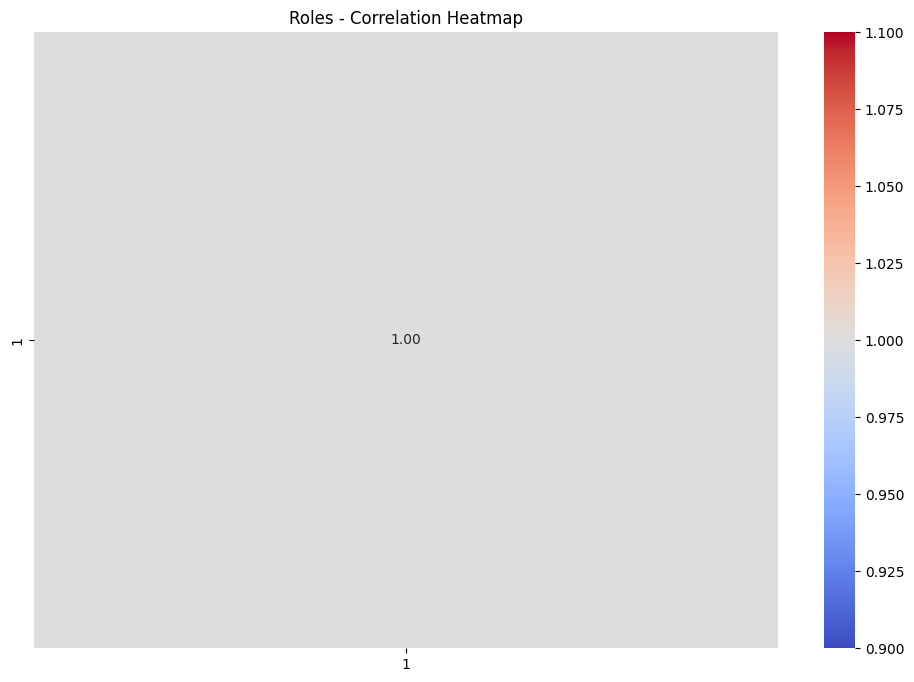

Roles Correlation Insights:
     1
1  1.0 

Services DataFrame has no numeric columns for correlation analysis.
Users DataFrame has no numeric columns for correlation analysis.


In [ ]:
# Correlation Analysis
def correlation_analysis(df, name):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    if numeric_df.empty:
        print(f"{name} DataFrame has no numeric columns for correlation analysis.")
        return
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{name} - Correlation Heatmap')
    plt.show()

    print(f"{name} Correlation Insights:")
    print(corr, "\n")

correlation_analysis(calls_df, "Calls")
correlation_analysis(counters_df, "Counters")
correlation_analysis(call_statuses_df, "Call Statuses")
correlation_analysis(languages_df, "Languages")
correlation_analysis(permissions_df, "Permissions")
correlation_analysis(queues_df, "Queues")
correlation_analysis(role_has_permissions_df, "Role Has Permissions")
correlation_analysis(roles_df, "Roles")
correlation_analysis(services_df, "Services")
correlation_analysis(users_df, "Users")


Summary of Algorithms Used:
Data Preparation:

Algorithm: Data Cleaning
Details: Drop duplicates, fill missing values using forward and backward fill methods, and remove outliers using a z-score method (3 standard deviations from the mean).
Descriptive Statistics:

Algorithm: Summary Statistics
Details: Calculate mean, standard deviation, minimum, and maximum for numeric columns.
Visualizations:

Algorithm: Distribution Plotting
Details: Plot histograms and KDE plots to visualize the distribution of numeric data.
Correlation Analysis:

Algorithm: Correlation Heatmap
Details: Calculate and visualize correlations between numeric columns using a heatmap.